# Dowloading Dataset from keras

In [1]:
from tensorflow import keras

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

# Understand the dataset

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

# Checking x_train and y_train and plotting Digit image

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

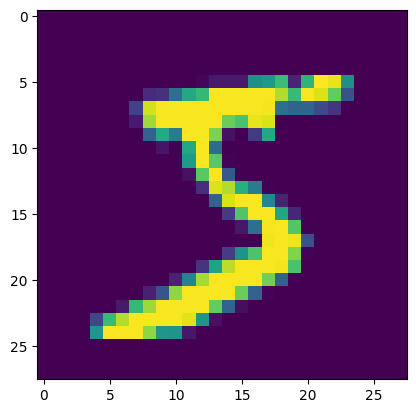

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20])

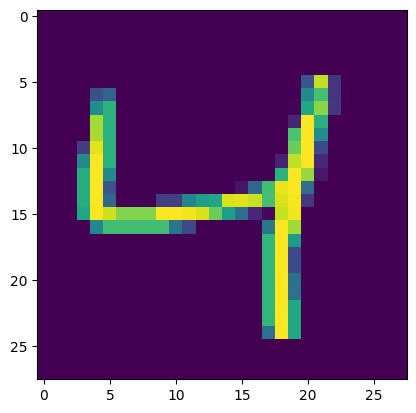

In [8]:
plt.imshow(x_train[2])

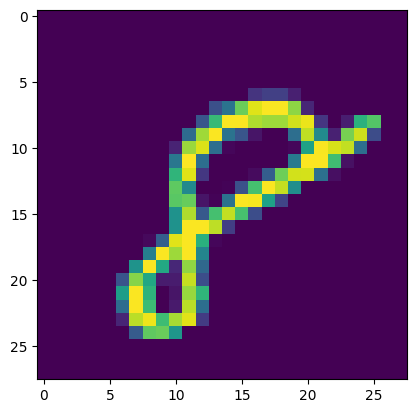

In [9]:
plt.imshow(x_train[-1])

# Normalizing training data

In [10]:
x_train=x_train/255
x_test=x_test/255

# Model building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\vishn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.0001)

# sparse categorical crossentropy

Imagine a guessing game with three baskets: apples, bananas, and cherries. Suppose the correct basket is apples (labeled 0). If the model guesses probabilities [0.2, 0.5, 0.3], the loss is –log(0.2), which is high because 0.2 is low. A better guess like [0.9, 0.05, 0.05] gives a low loss (–log(0.9)).

In [14]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [16]:
history=model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=30,
          callbacks=[early_stop])


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7244 - loss: 0.9775 - val_accuracy: 0.9230 - val_loss: 0.2755
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9249 - loss: 0.2698 - val_accuracy: 0.9385 - val_loss: 0.2143
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9433 - loss: 0.2081 - val_accuracy: 0.9484 - val_loss: 0.1764
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9515 - loss: 0.1727 - val_accuracy: 0.9544 - val_loss: 0.1572
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9593 - loss: 0.1478 - val_accuracy: 0.9587 - val_loss: 0.1387
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9640 - loss: 0.1275 - val_accuracy: 0.9616 - val_loss: 0.1295
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9674 - loss: 0.1158 - val_accuracy: 0.9645 - val_loss: 0.1196
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9713 - loss: 0.1029

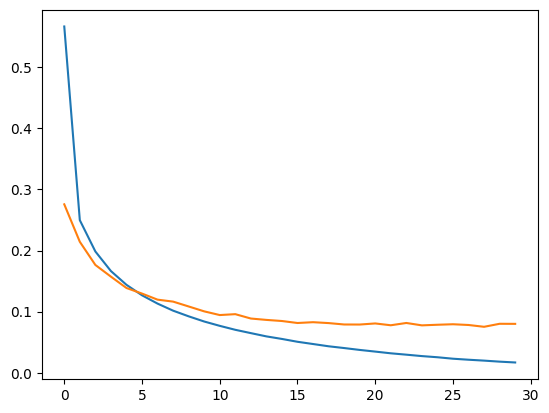

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

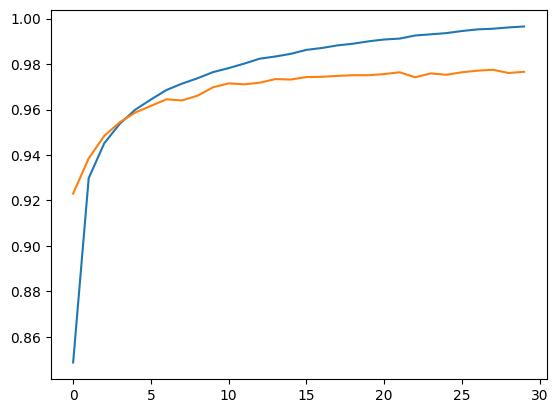

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
# model predict digit 7 of x_test data
y_pred[0]

7

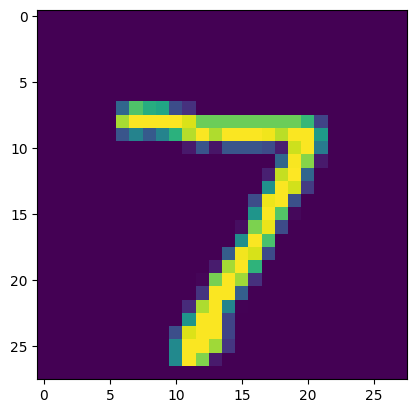

In [21]:
plt.imshow(x_test[0])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9775

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted digit: 6


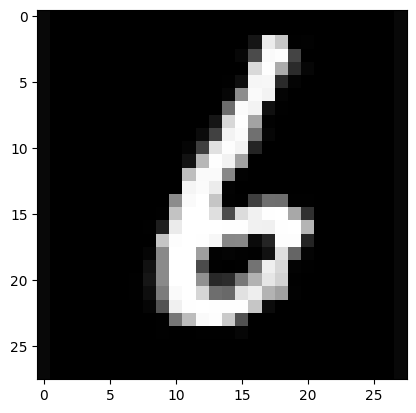

In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('model.h5')
img = cv2.imread("six.png", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not found.")
else:
    if np.mean(img) > 128:
        img = 255 - img
    img = cv2.resize(img, (28, 28))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    digit = np.argmax(pred, axis=1)[0]
    print("Predicted digit:", digit)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()


In [24]:
model.save('model.h5')